In [1]:
#importing relevant libraries 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#import data 
grading_df = pd.read_csv("grading_train.tsv", sep='\t')
grading_df.head()

,Id,EssaySet,Score1,Score2,EssayText
0,1,1,1,1,Some additional information that we would need...
1,2,1,1,1,"After reading the expirement, I realized that ..."
2,3,1,1,1,"What you need is more trials, a control set up..."
3,4,1,0,0,The student should list what rock is better an...
4,5,1,2,2,For the students to be able to make a replicat...


In [3]:
#using count vectorization to extract features from the text 
#assiging relevant data to the X and y variables.

count_vect = CountVectorizer()
X = count_vect.fit_transform(grading_df['EssayText'].values)
y = grading_df['Score1'].values

#splitting the data into testing and training data to test for accuracy 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 35)

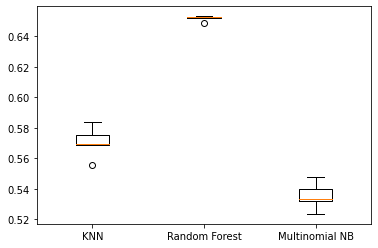

In [4]:
#testing three kinds of classification models to evaluate the one best suited for the application
models = {'KNN': KNeighborsClassifier(n_neighbors = 6), 'Random Forest': RandomForestClassifier(), 'Multinomial NB': MultinomialNB()}

results = []
for model in models.values():
    kf = KFold(n_splits = 5, random_state = 35, shuffle = True)
    cv_score = cross_val_score(model, X_train, y_train, cv = kf)
    results.append(cv_score)

# a general overveiw of how the difference in accuracies 
plt.boxplot(results, labels=models.keys())
plt.show()


In [5]:
#further exploration of model accuracy using several metrics like classification report

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Classification report for {}".format(name))
    print(classification_report(y_test, y_pred))
    print('-----------------------------------------')
    

Classification report for KNN
              precision    recall  f1-score   support

           0       0.61      0.86      0.72      1715
           1       0.53      0.43      0.47      1354
           2       0.63      0.43      0.51      1038
           3       0.41      0.17      0.24       195

    accuracy                           0.59      4302
   macro avg       0.55      0.47      0.49      4302
weighted avg       0.58      0.59      0.57      4302

-----------------------------------------
Classification report for Random Forest
              precision    recall  f1-score   support

           0       0.73      0.81      0.77      1715
           1       0.61      0.59      0.60      1354
           2       0.61      0.63      0.62      1038
           3       0.68      0.08      0.14       195

    accuracy                           0.66      4302
   macro avg       0.66      0.52      0.53      4302
weighted avg       0.66      0.66      0.65      4302

------------------

In [7]:
#paramter tuning for Random forest
train_accuracies = {}
test_accuracies = {}
n = np.arange(50, 120, 10)

#trying different values for the model paramter n_estimators, which are the number of individual decision trees used in random forest
for estimator in n:
    RFC = RandomForestClassifier(n_estimators = estimator)
    RFC.fit(X_train, y_train)
    train_accuracies[estimator] = RFC.score(X_train, y_train)
    test_accuracies[estimator] = RFC.score(X_test, y_test)
    
#plotting the accuracies using different parameter values to account for underfitting or overfitting
plt.title("Random Forest: Varying numbers of trees of the forest")
plt.plot(n, train_accuracies.values(), label = 'Training accuracy')
plt.plot(n, test_accuracies.values(), label = 'Testing accuracy')
plt.legend()
plt.xlabel("Number of Estimators (trees)")
plt.ylabel("Accuracy")
plt.show()

KeyboardInterrupt: 

In [ ]:
RFC = RandomForestClassifier(n_estimators = 2000)
RFC.fit(X_train, y_train)
score = RFC.score(X_test, y_test)
print("Random forest Test Accuracy after Parameter tuning: {}".format(score))

In [ ]:
#paramter tuning for KNN
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 20)

#trying different values for the model paramter n_neighbors, which is the number of neighbors used to classify a datum
for n in neighbors:
    KNN = KNeighborsClassifier(n_neighbors = n)
    KNN.fit(X_train, y_train)
    train_accuracies[n] = KNN.score(X_train, y_train)
    test_accuracies[n] = KNN.score(X_test, y_test)

#plotting the accuracies using different parameter values to account for underfitting or overfitting
plt.title("KNN: Varying numbers of neighbors")
plt.plot(neighbors, train_accuracies.values(), label = 'Training accuracy')
plt.plot(neighbors, test_accuracies.values(), label = 'Testing accuracy')
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
#based on the testing, 13 seems to be a good point to test for increased accuracy 
KNN = KNeighborsClassifier(n_neighbors = 13)
KNN.fit(X_train, y_train)
score = KNN.score(X_test, y_test)
print("KNN Test Accuracy after Parameter tuning: {}".format(score))